<a href="https://colab.research.google.com/github/sapto-nugroho/PCD/blob/main/PCD_Assignment03/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama : Sapto Nugroho

##NIU : 565712

### Import

In [1]:
!ls
!git clone https://github.com/sapto-nugroho/PCD.git
!ls

sample_data
Cloning into 'PCD'...
remote: Enumerating objects: 589, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 589 (delta 80), reused 25 (delta 20), pack-reused 368 (from 3)
Receiving objects: 100% (589/589), 26.24 MiB | 10.98 MiB/s, done.
Resolving deltas: 100% (169/169), done.
PCD  sample_data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, img_as_float
import cv2
import copy

### Input

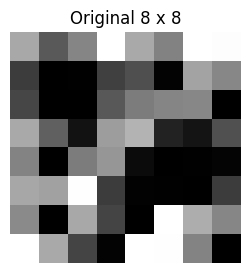

In [11]:
# img_path = '/content/PCD/PCD_Assignment03/images/woman01.jpg'
# img_path = '/content/PCD/PCD_Assignment03/images/script.png'
# img_path = '/content/PCD/PCD_Assignment03/images/grid.jpg'
# img_path = '/content/PCD/PCD_Assignment03/images/16x16.jpg'
img_path = '/content/PCD/PCD_Assignment03/images/8x8.jpg'
# img_path = '/content/PCD/PCD_Assignment03/images/4x4.jpg'
#
img0 = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img0 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)
# img = img_as_float(img)

img = copy.deepcopy(img0)
# print(img.shape)
# print(img)

plt.figure(figsize=(10,3))
plt.imshow(img, cmap='gray')
plt.title(f"Original {img.shape[0]} x {img.shape[1]}")
plt.axis("off")

plt.show()

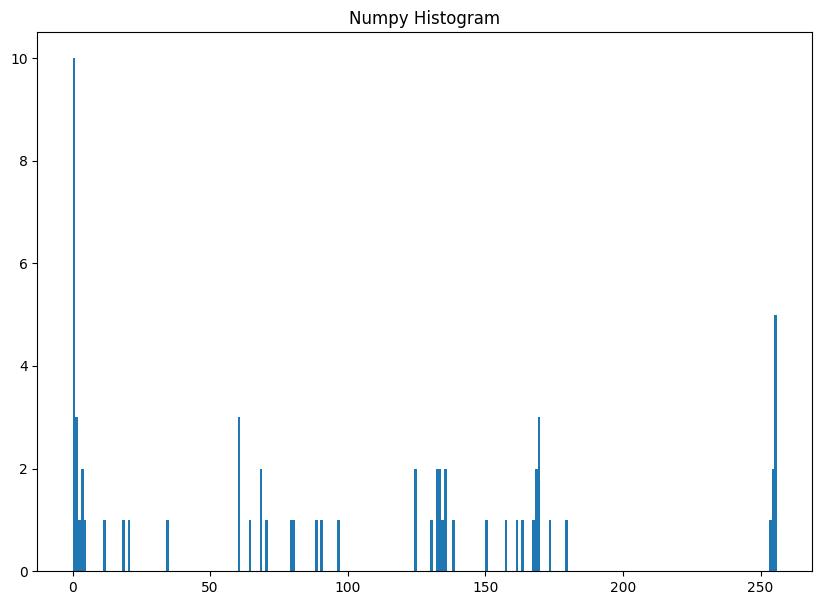

In [22]:
# print(img.shape)
# print(img)

img1d = img.ravel()
# print(img1d.shape)
# print(img1d)

val, freq = np.unique(img1d, return_counts=True)
# print(val.shape)
# print(freq.shape)
# print(val)
# print(freq)

bins = np.arange(0, 257)
# print(bins)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.hist(img1d, bins)
plt.title("Numpy Histogram")
# plt.xticks(np.arange(min(bins), max(bins)+1, 1.0))
# plt.yticks(np.arange(min(freq), max(freq)+1, 1.0))
plt.show()

### **Segmentasi**

####  **Pixel based**



##### Basic Global Thresholding

Threshold (T):  102.0


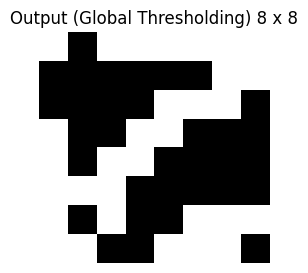

In [48]:
T1 =np.floor(np.mean(img1d))#Nilai Threshold
T2 = T1
T3 = 0
sorted = np.sort(img1d)
output = np.zeros_like(img)

while (T3-T1 != 0):
  first = sorted[sorted <= T2]
  second = sorted[sorted > T2]
  T1 = T2
  # print(first)
  # print(second)
  # print(np.floor(np.mean(first)))
  # print(np.floor(np.mean(second)))

  m1 = np.floor(np.mean(first))
  m2 = np.floor(np.mean(second))
  T3 = (m1+m2)/2
  # print(T1)
  # print(T3)
  # print(T3-T1)
  T2 = T3

T3 = np.floor(T3)
print("Threshold (T): ",T3)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i,j] > T3:
      output[i,j] = 255
    else:
      output[i,j] = 0

#Plot
plt.figure(figsize=(10,3))
plt.imshow(output, cmap='gray')
plt.title(f"Output (Global Thresholding) {img.shape[0]} x {img.shape[1]}")
plt.axis("off")
plt.show()

##### Otsu Method

Threshold (T):  124


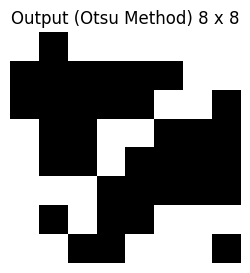

In [47]:
img1d = img.ravel()
sorted = np.sort(img1d)
val, freq = np.unique(sorted, return_counts=True)
# print(val)
# print(freq)

# val_freq = np.stack((val,freq), axis=1)
# print(val_freq)

var_w = np.zeros(len(val))

for i in range(1,len(val)):
  # print(i)
  weight_b = np.sum(freq[0:i])/np.sum(freq)
  mean_b = np.sum(val[0:i]*freq[0:i])/np.sum(freq[0:i])
  var_b = np.sum(((val[0:i]-mean_b)**2)*freq[0:i])/np.sum(freq[0:i])

  weight_f = np.sum(freq[i:])/np.sum(freq)
  mean_f = np.sum(val[i:]*freq[i:])/np.sum(freq[i:])
  var_f = np.sum(((val[i:]-mean_f)**2)*freq[i:])/np.sum(freq[i:])

  var_w[i] = weight_b*var_b + weight_f*var_f

# print(var_w.shape)
# print(var_w)

mask = (var_w != 0) & ~np.isnan(var_w)
min_idx = np.nanargmin(np.where(mask, var_w, np.nan))
min_val = var_w[min_idx]

# print(min_idx, min_val)
T = val[min_idx]
print("Threshold (T): ",T)

output = np.zeros_like(img)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i,j] > T:
      output[i,j] = 255
    else:
      output[i,j] = 0

#Plot
plt.figure(figsize=(10,3))
plt.imshow(output, cmap='gray')
plt.title(f"Output (Otsu Method) {img.shape[0]} x {img.shape[1]}")
plt.axis("off")
plt.show()

##### Adaptive Thresholding

##### Probability Thresholding

####  **Region based**

##### Region Growing

##### Watershed / Flood fill

##### Clustering

#### **Feature based / Detection**

##### Sliding Window

### **Morphological Process**